$\Large\textbf{Welcome to IE 684 (Spring 202-23)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [4]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import pandas as pd
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [5]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [6]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [7]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [8]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [9]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [10]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


$\large\textbf{[R] What is the minimizer and minimum function value of f(x) = f(x1, x2) = (x1 + 100)2 + (x2 − 25)2}$

In [11]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)
print(fvals_ret[-1])

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

$\large\textbf{Answer:} \\ \text{So minimizer is } x_1=-99.99958844 ∼-100,x_2=24.99994388  ∼ 25 \\ \text{Minimum function value:} 1.7253033717248775e-07 ∼ 0$

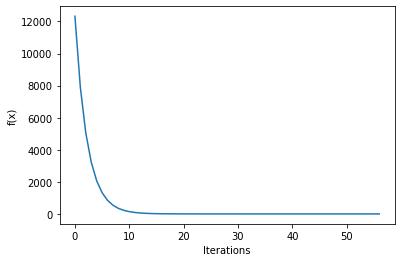

In [12]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

$\large\textbf{[R]} 
\\ \text{With starting point x0 = (10, 10) and η = 0.1, we will now study the behavior of the algorithm for different tolerance values.} \\ \text{Try τ = 10−p where p = 1, 2, . . . , 10. For each τ , record the final minimizer, final objective function value and number of iterations taken by the algorithm to terminate.} \\ \text{ Prepare a plot where the number of iterations is plotted against τ values. Comment on the observations.} \\ \text{Comment about the minimizers and objective function values obtained for different choices of the tolerance values.}$

In [13]:
def find_minimizer_1(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  iter_count=0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    iter_count+=1
    #append the current function value to the list containing function values
    fvals.append(evalf(x))
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals,iter_count 


In [17]:
tolerance_value=[]
iterations=[]
objective_val=[]
for p in range(1,11):
  my_start_x = np.array([10,10])
  my_steplength = 0.1
  my_tol=(10)**(-p)  #10^{-p} or 0.001
  opt_x, fvals_ret,number_of_iteration = find_minimizer_1(my_start_x, my_tol, my_steplength)
  tolerance_value.append(my_tol)
  iterations.append(number_of_iteration)
  objective_val.append(fvals_ret[-1])
  print('when tolerance value is',my_tol)
  print('Optimizer:',opt_x)
  print('objective function value:',fvals_ret[-1])
  print('number of iterations:',number_of_iteration)
  print('---------------------------------------------------------------')
  
print('tolerance_values:',tolerance_value)  
print('number of iterations:',iterations)




when tolerance value is 0.1
Optimizer: [-99.9553787   24.99391528]
objective function value: 0.0020280843668995063
number of iterations: 35
---------------------------------------------------------------
when tolerance value is 0.01
Optimizer: [-99.99520882  24.99934666]
objective function value: 2.3382220797474075e-05
number of iterations: 45
---------------------------------------------------------------
when tolerance value is 0.001
Optimizer: [-99.99958844  24.99994388]
objective function value: 1.7253033717248775e-07
number of iterations: 56
---------------------------------------------------------------
when tolerance value is 0.0001
Optimizer: [-99.99995581  24.99999397]
objective function value: 1.989139359193299e-09
number of iterations: 66
---------------------------------------------------------------
when tolerance value is 1e-05
Optimizer: [-99.99999526  24.99999935]
objective function value: 2.293321544605827e-11
number of iterations: 76
----------------------------------

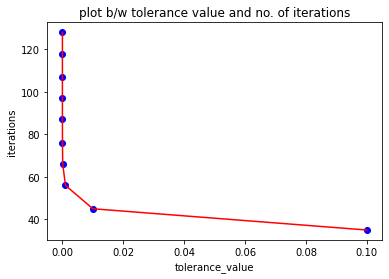

In [20]:
plt.plot(tolerance_value,iterations,color='r')
plt.scatter(tolerance_value,iterations,color='b')
plt.title('plot b/w tolerance value and no. of iterations')
plt.xlabel('tolerance_value')
plt.ylabel('iterations')
plt.show()


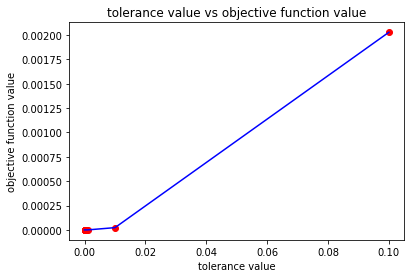

In [21]:
plt.plot(tolerance_value,objective_val,color='b')
plt.scatter(tolerance_value,objective_val,color='r')
plt.title('tolerance value vs objective function value')
plt.xlabel('tolerance value')
plt.ylabel('objective function value')
plt.show()

$\large\textbf{Observations_1:} \textbf{tolerance value and number of iterations}$  By above plot we can easily observe that as soon as tolerance value decreases ,number of iterations taken by gradient descent to reach optimal value of function increases. As we can see that when tolerance value is 0.10 then number of iterations are low but if tolerance value is below than 0.01 then number of iterations are high that means that as soon as tolerance value decreases gradient descent takes more iterations to reach optimal condition.

$\large\textbf{Observations_2:} \textbf{tolerance value and Objective function values:} $ As we can see that when the tolerance value is 0.1 then our algorithm can not properly minimize our objective function in comparison of lower tolerance values. In plot as soon as tolerance value is decreasing optimised value of function is also decreasing and as tolerance value converges to zero then function also converges to its minimum value.

$\large\textbf{Observations_3:} \textbf{tolerance value and minimizers:}$ In observations we can see that as soon as tolerance value decreases minimizers also converges to optimal minimizers.

$\large\textbf{. [R]} $ With starting point $x_0 = (10, 10)$ and $τ = 10^{−5}$, we will study the behavior of the algorithm for different
step length values. Try $ η ∈\{ {0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}\}.$ \\
 For each $η,$ record the final minimizer, final objective function value and number of iterations taken by the algorithm to terminate. \\
Prepare a plot where the number of iterations is plotted against η values. Comment on the observations. \\
Comment about the minimizers and objective function values obtained for different choices of the step length values.


In [26]:
step_size=[]
iterations_1=[]
objective_val_1=[]
for alpha in [0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]:
  my_start_x = np.array([10,10])
  my_steplength = alpha
  my_tol=(10)**(-5)  #10^{-p} or 0.001
  opt_x, fvals_ret,number_of_iteration = find_minimizer_1(my_start_x, my_tol, my_steplength)
  step_size.append(my_steplength)
  iterations_1.append(number_of_iteration)
  objective_val_1.append(fvals_ret[-1])
  print('when step size is',alpha)
  print('Optimizer:',opt_x)
  print('objective function value:',fvals_ret[-1])
  print('number of iterations:',number_of_iteration)
  print('---------------------------------------------------------------')
print(step_size)  
print(iterations_1)
print(objective_val_1)



when step size is 0.0001
Optimizer: [-99.99999505  24.99999932]
objective function value: 2.49936770204995e-11
number of iterations: 84571
---------------------------------------------------------------
when step size is 0.001
Optimizer: [-99.99999505  24.99999933]
objective function value: 2.494219709847674e-11
number of iterations: 8450
---------------------------------------------------------------
when step size is 0.01
Optimizer: [-99.99999512  24.99999933]
objective function value: 2.4304673044883465e-11
number of iterations: 838
---------------------------------------------------------------
when step size is 0.1
Optimizer: [-99.99999526  24.99999935]
objective function value: 2.293321544605827e-11
number of iterations: 76
---------------------------------------------------------------
when step size is 0.2
Optimizer: [-99.99999685  24.99999957]
objective function value: 1.011747066175869e-11
number of iterations: 34
--------------------------------------------------------------

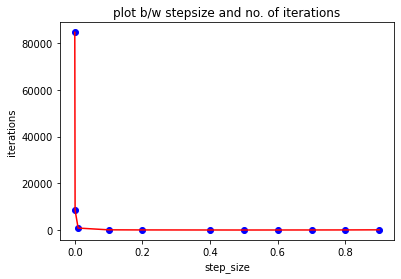

In [30]:
plt.plot(step_size,iterations_1,color='r')
plt.scatter(step_size,iterations_1,color='b')
plt.title('plot b/w stepsize and no. of iterations')
plt.xlabel('step_size')
plt.ylabel('iterations')
plt.show()

$\large\textbf{Observations_1:} \textbf{step size and number of iterations:}$ As the above graph we can see that as soon as step size becomes too small that means as step size becomes nearer to zero than suddenly value increases to above 80000 iterations but if it is more than 0.01 and less than 1 then number of iterations are almost same and low in counting.

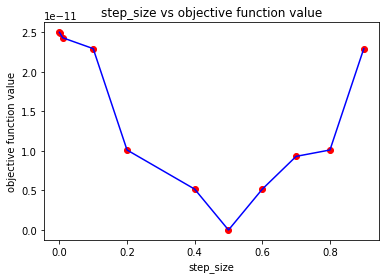

In [27]:
plt.plot(step_size,objective_val_1,color='b')
plt.scatter(step_size,objective_val_1,color='r')
plt.title('step_size vs objective function value')
plt.xlabel('step_size')
plt.ylabel('objective function value')
plt.show()

$\large\textbf{Observations_2:} \textbf{step size and objective_function_value:}$ By above graph we can see that when step size is near to zero or near to 1 then objective function is not properly minimized but when it is in middle of 0 and 1 that mean that when step size is about 0.5 then function is properly minimized and objective function is near to its optimal value. So it concludes that step size need not be high nor low it must be between to high and low step size.

$\large\textbf{Observations_3:} \textbf{step size and minimizers:}$ As by observations we can see that when step size is low then minimizers are not properly minimizing the objective function value but when step size increases minimizers starts going nearer to optimal values but after some time it again starts going away from optimal values.

$\large\textbf{[R]} $ With τ = 10−5 and η = 0.1, we will study the behavior of the algorithm for different starting points.
Consider $x_0  \in $ {(10000, 10000),(500, 0),(0, 1000),(1, 1),(−500, −2). Prepare a table listing the final minimizer,
final objective function value and number of iterations taken by the algorithm to terminate for the different starting points. Comment on your observations.

In [31]:
starts=[[10000,10000],[500,0],[0,1000],[1,1],[-500,-2]]
objectinve_function_value=[]
minimizer=[]
iterations2=[]


for starting_point in [[10000,10000],[500,0],[0,1000],[1,1],[-500,-2]]:
  my_start_x = np.array(starting_point)
  my_steplength = 0.1
  my_tol=(10)**(-5)  #10^{-p} or 0.001
  opt_x, fvals_ret,number_of_iteration = find_minimizer_1(my_start_x, my_tol, my_steplength)
  objectinve_function_value.append(fvals_ret[-1])
  minimizer.append(opt_x)
  iterations2.append(number_of_iteration)

  #print('Starting point  |      objectinve function value   |   minimizer    |      number of iterations')
  #print(starting_point,' |     ',opt_x,'      |     ',fvals_ret[-1],'     |   ',number_of_iteration)
  #print(fvals_ret[-1])
  #print(number_of_iteration)
print(objectinve_function_value)
print(minimizer)
print(iterations2)  




[2.0414342669998657e-11, 1.888746375147865e-11, 2.060780080476227e-11, 2.0052840841640608e-11, 2.055190630073527e-11]
[array([-99.99999679,  25.00000317]), array([-99.99999566,  24.99999982]), array([-99.99999954,  25.00000452]), array([-99.99999564,  24.99999896]), array([-100.00000452,   24.99999969])]
[98, 84, 86, 76, 82]


In [33]:
table=pd.DataFrame(np.array([0 for i in range(20)]).reshape(5,4),[i for i in range(1,6)],['Starting_point','objective_funcion_value','minimizer','number_of_iterations'])

In [34]:
table['Starting_point']=starts
table['objective_funcion_value']=objectinve_function_value
table['minimizer']=minimizer
table['number_of_iterations']=iterations2

|index|Starting\_point|objective\_funcion\_value|minimizer|number\_of\_iterations|
|---|---|---|---|---|
|1|10000,10000|2\.0414342669998657e-11|\[-99\.99999679  25\.00000317\]|98|
|2|500,0|1\.888746375147865e-11|\[-99\.99999566  24\.99999982\]|84|
|3|0,1000|2\.060780080476227e-11|\[-99\.99999954  25\.00000452\]|86|
|4|1,1|2\.0052840841640608e-11|\[-99\.99999564  24\.99999896\]|76|
|5|-500,-2|2\.055190630073527e-11|\[-100\.00000452   24\.99999969\]|82|


$\large\textbf{Observations:}$ As we know theoritically that if our starting point is near to minimizer then it takes low number of iterations to reach minimizer but here all starting points are far away than minimizer so all the number of iterations are almost nearer to each other.And objective function value is also approximately same obtained.

In [35]:
table

,Starting_point,objective_funcion_value,minimizer,number_of_iterations
1,"[10000, 10000]",2.041434e-11,"[-99.9999967853026, 25.00000317491154]",98
2,"[500, 0]",1.888746e-11,"[-99.99999565779666, 24.999999819074862]",84
3,"[0, 1000]",2.060780e-11,"[-99.99999953683165, 25.000004515891483]",86
4,"[1, 1]",2.005284e-11,"[-99.99999564327261, 24.999998964738047]",76
5,"[-500, -2]",2.055191e-11,"[-100.0000045231285, 24.999999694688828]",82
